In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [78]:
df = pd.read_csv("creditcard.csv")

In [79]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,27369,-1.160116,-0.244177,0.744250,-0.192350,1.156356,-1.931383,0.409670,-0.364716,-0.516156,...,-0.021714,0.012447,-0.360625,0.514926,0.064194,1.026317,-0.030845,-0.083609,52.90,0.0
15932,27369,-3.058318,3.099206,-4.932555,1.924138,-1.576032,-2.135383,-0.830098,2.228617,-0.312343,...,-0.111526,-0.485223,-0.003945,0.049422,-0.173962,-0.379260,0.171872,-0.236166,99.99,0.0
15933,27369,-0.661806,0.315385,2.011194,-0.438757,-0.554990,-0.668072,0.424651,0.079141,0.126057,...,0.148063,0.177511,0.134794,0.359931,-0.544428,0.181545,0.068546,0.153438,74.58,0.0
15934,27370,1.525348,-1.231442,0.420095,-1.551218,-1.376006,0.100758,-1.455755,0.134876,-1.319056,...,-0.108619,0.084883,-0.051758,-0.815038,0.331989,-0.015837,0.058942,0.011087,6.00,0.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

In [81]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [82]:
df = df.dropna()

In [83]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [84]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Time,15935.0,12120.260872,8981.753206,0.000000,3633.000000,10980.000000,20617.000000,27370.000000
V1,15935.0,-0.254396,1.843095,-28.344757,-0.970838,-0.318487,1.161927,1.960497
V2,15935.0,0.277226,1.491528,-40.978852,-0.286415,0.247479,0.884715,14.601998
V3,15935.0,0.803938,1.704271,-27.368650,0.371882,0.941842,1.576016,4.101716
V4,15935.0,0.301421,1.491727,-5.172595,-0.620946,0.231458,1.180129,11.927512
V5,15935.0,-0.130464,1.382528,-32.092129,-0.712555,-0.186223,0.352261,34.099309
V6,15935.0,0.112588,1.329439,-23.496714,-0.639044,-0.160707,0.501990,21.393069
V7,15935.0,-0.150437,1.321939,-26.548144,-0.600860,-0.084684,0.440019,34.303177
V8,15935.0,0.000702,1.303549,-23.632502,-0.179140,0.017475,0.266221,17.052566
V9,15935.0,0.860951,1.253948,-7.175097,0.067268,0.851983,1.567852,10.392889





Podemos ver que tenemos dos columnas, que necesitamos normalizar ya que numericamente se encuentran en escalas distintas a las demas. 

In [85]:
from sklearn import preprocessing
scaler= preprocessing.StandardScaler()
df[["Amount", "Time"]]=scaler.fit_transform(df[["Amount", "Time"]])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [86]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.349474,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.439557,0.0
1,-1.349474,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.336417,0.0
2,-1.349363,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.649174,0.0
3,-1.349363,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.301611,0.0
4,-1.349251,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.019011,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15930,1.697688,-0.711494,0.785312,1.918214,-0.319681,0.113449,-1.279736,0.728519,-0.114506,-0.511745,...,-0.138591,-0.555546,-0.005721,0.687330,-0.210935,-0.067870,0.032099,0.111371,-0.343810,0.0
15931,1.697800,-1.160116,-0.244177,0.744250,-0.192350,1.156356,-1.931383,0.409670,-0.364716,-0.516156,...,-0.021714,0.012447,-0.360625,0.514926,0.064194,1.026317,-0.030845,-0.083609,-0.071245,0.0
15932,1.697800,-3.058318,3.099206,-4.932555,1.924138,-1.576032,-2.135383,-0.830098,2.228617,-0.312343,...,-0.111526,-0.485223,-0.003945,0.049422,-0.173962,-0.379260,0.171872,-0.236166,0.177449,0.0
15933,1.697800,-0.661806,0.315385,2.011194,-0.438757,-0.554990,-0.668072,0.424651,0.079141,0.126057,...,0.148063,0.177511,0.134794,0.359931,-0.544428,0.181545,0.068546,0.153438,0.043252,0.0


Text(0.5, 1.0, 'Grafico de barras en proporcion a el numero de transaciones correctas en comparacion a estafas.')

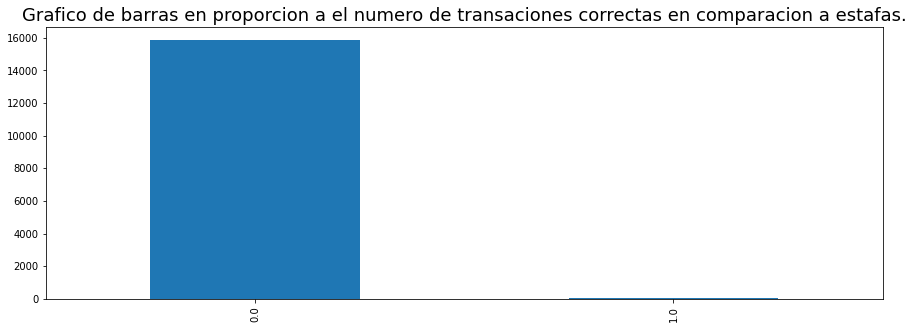

In [87]:
grafica5= df["Class"].value_counts().plot(kind="bar", figsize= (15,5));
plt.title("Grafico de barras en proporcion a el numero de transaciones correctas en comparacion a estafas.", color = 'black',
                    size = 18) 

In [88]:
print(pd.value_counts(df['Class'], sort = True))

0.0    15862
1.0       73
Name: Class, dtype: int64


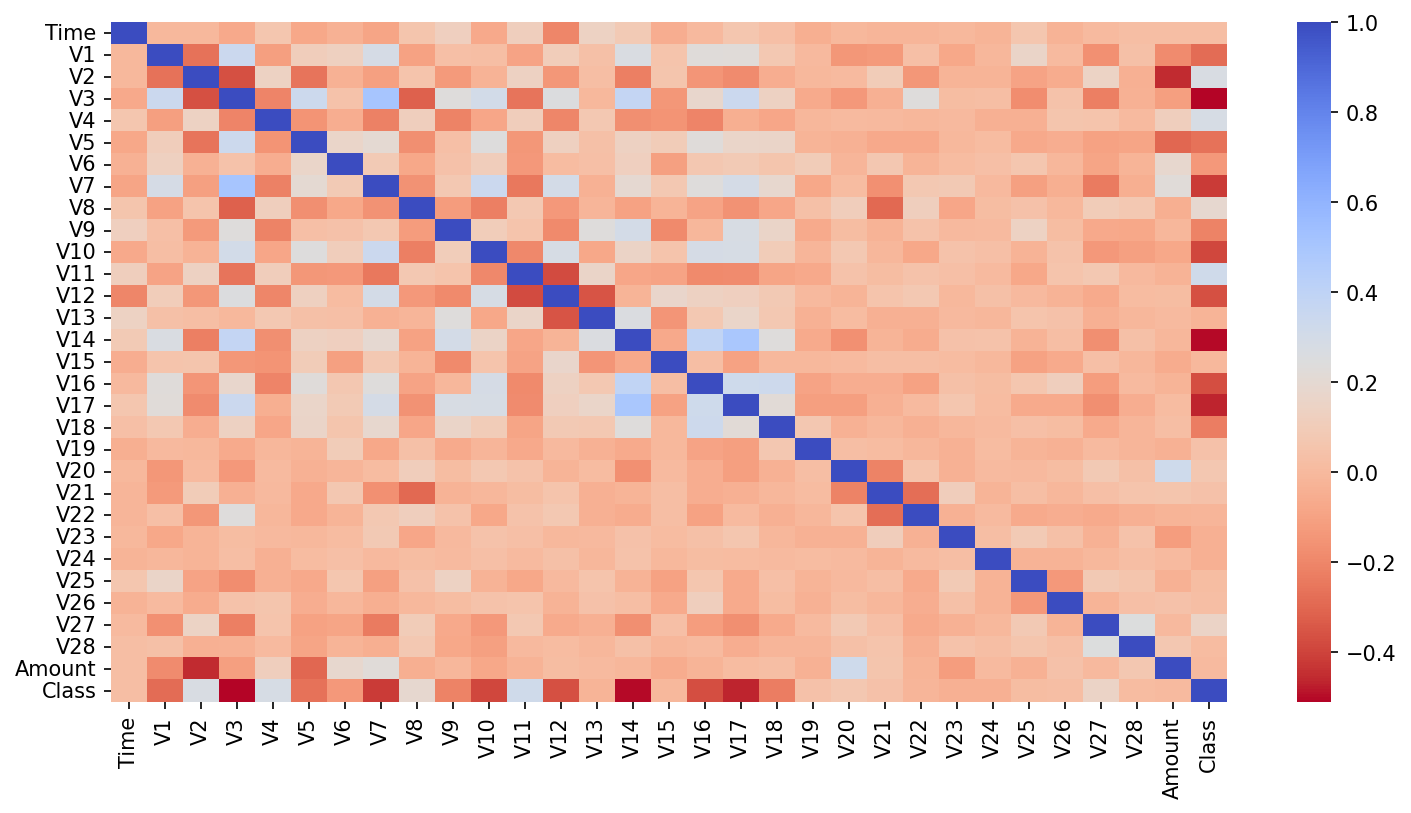

In [89]:
plt.figure(figsize=(12,6), dpi=150)
sns.heatmap(data= df.corr(), cmap='coolwarm_r')

Como podemos notar en la grafica nuestros datos se encuentran desbalanceados. 

In [90]:
y = df["Class"]

In [91]:
X = df.drop('Class', axis=1)


In [92]:
print(pd.value_counts(y, sort = True))

0.0    15862
1.0       73
Name: Class, dtype: int64


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [94]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)



Text(0.5, 1.0, 'Grafico de barras, luego de balancear los datos.')

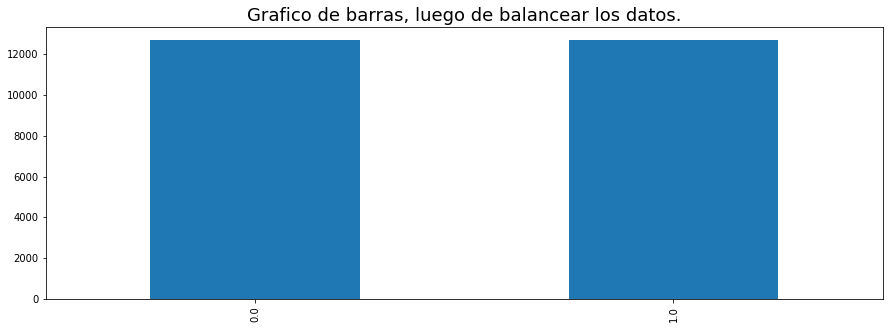

In [105]:
grafica5= y_train_res.value_counts().plot(kind="bar", figsize= (15,5));
plt.title("Grafico de barras, luego de balancear los datos.", color = 'black',
                    size = 18) 

***Implementacion de algoritmos***

In [96]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_res, y_train_res)
preknn = knn.predict(X_test)
preknn

array([0., 0., 0., ..., 0., 0., 0.])

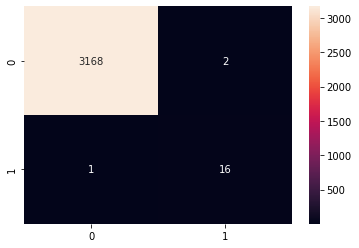

[[3168    2]
 [   1   16]]


In [97]:
matrizknn = confusion_matrix(y_test, preknn) 
sns.color_palette('icefire')
sns.heatmap(matrizknn, annot=True, fmt='d')
plt.show()
print(matrizknn)

In [98]:
reporte3 = classification_report(y_test, preknn)
print(reporte3)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3170
         1.0       0.89      0.94      0.91        17

    accuracy                           1.00      3187
   macro avg       0.94      0.97      0.96      3187
weighted avg       1.00      1.00      1.00      3187



In [99]:
add = DecisionTreeClassifier(max_depth=4)


In [100]:
add.fit(X_train_res, y_train_res)


DecisionTreeClassifier(max_depth=4)

In [101]:
predadd = add.predict(X_test)
predadd

array([0., 0., 0., ..., 0., 0., 0.])

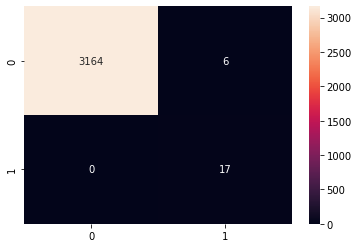

[[3164    6]
 [   0   17]]


In [102]:
matrizadd = confusion_matrix(y_test, predadd) 
sns.color_palette('icefire')
sns.heatmap(matrizadd, annot=True, fmt='d')
plt.show()
print(matrizadd)